In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random
import datetime

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
# MODEL = "models/rcnn_resnet101/frozen_inference_graph.pb"
# MODEL = "models/rcnn/frozen_inference_graph.pb"
MODEL = "models/udacity_site/frozen_inference_graph.pb"
LABELS = "data/udacity_label_map.pbtxt"
NUM_CLASSES = 4
IMAGE_SIZE = (12, 8)
IMAGES = "data-downloads/alex-lechner-udacity-traffic-light-dataset/udacity_testarea_rgb"
TEST_IMAGES = glob(os.path.join(IMAGES, "*.jpg"))


In [4]:
label_map = label_map_util.load_labelmap(LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


secs=2.075209, scores=[ 0.53159422  0.00811554  0.00477531  0.00456999  0.00418656  0.00416828
  0.00409672  0.00406155  0.00397799  0.0039265 ], classes=[ 1.  1.  1.  4.  3.  4.  3.  4.  2.  1.]


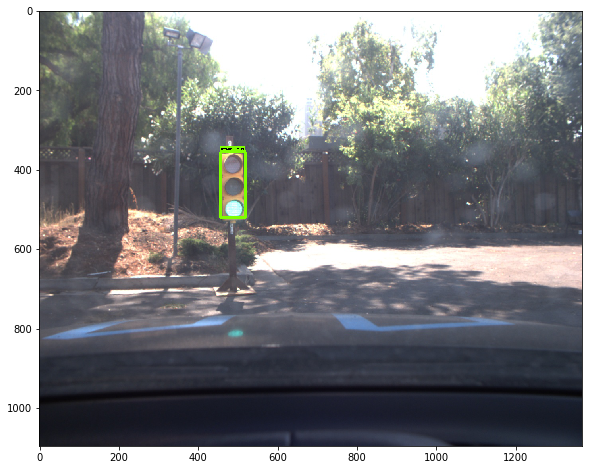

secs=1.320284, scores=[ 0.96800262  0.00540194  0.00467016  0.00463374  0.00435975  0.0041665
  0.00384209  0.00371226  0.0036859   0.00364394], classes=[ 1.  3.  1.  1.  1.  1.  4.  2.  2.  3.]


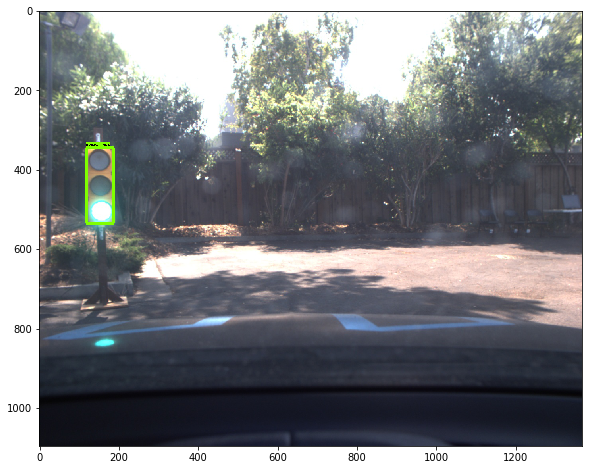

secs=1.221882, scores=[ 0.83923024  0.01980845  0.01015057  0.00462421  0.00461717  0.00417599
  0.00415405  0.00391278  0.00384716  0.00378828], classes=[ 2.  3.  1.  2.  3.  4.  1.  4.  4.  2.]


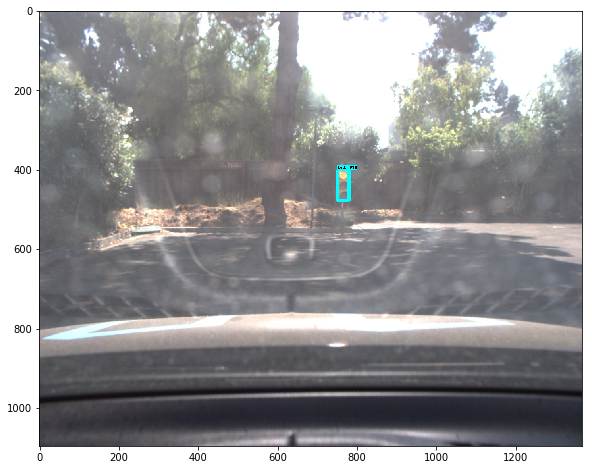

secs=1.292452, scores=[ 0.99630105  0.00520243  0.00512766  0.00424551  0.0037808   0.00372692
  0.00371238  0.00368202  0.00367198  0.00359464], classes=[ 1.  2.  4.  4.  1.  1.  4.  4.  3.  2.]


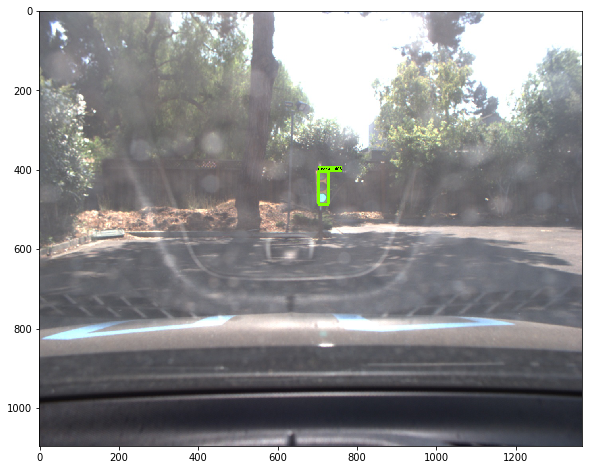

secs=1.240632, scores=[ 0.50329667  0.01643662  0.00548367  0.00519439  0.00452499  0.00447538
  0.00441263  0.00436528  0.00434848  0.00434192], classes=[ 1.  1.  4.  4.  4.  1.  1.  1.  4.  4.]


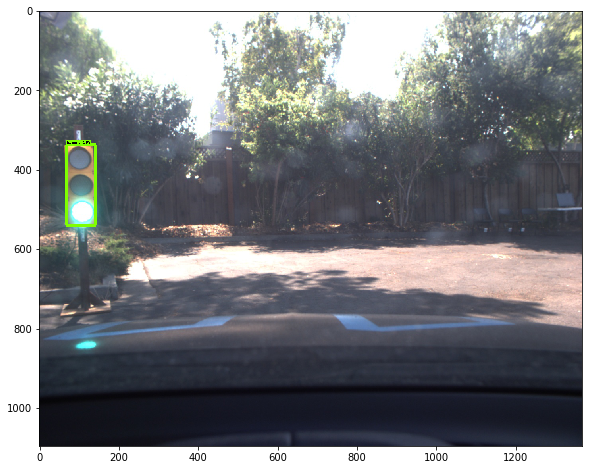

secs=1.269518, scores=[ 0.64399469  0.16978566  0.00424203  0.00396959  0.00392013  0.00375092
  0.00365426  0.00361678  0.00355059  0.00352715], classes=[ 1.  1.  1.  2.  4.  4.  2.  1.  3.  4.]


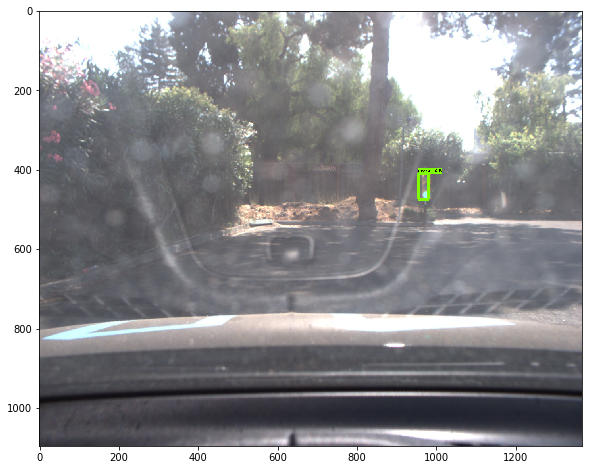

secs=1.29531, scores=[ 0.75159943  0.70932162  0.06513267  0.00675699  0.0048912   0.00483756
  0.00481661  0.00478083  0.00469797  0.00465016], classes=[ 1.  3.  2.  4.  1.  4.  1.  3.  4.  4.]


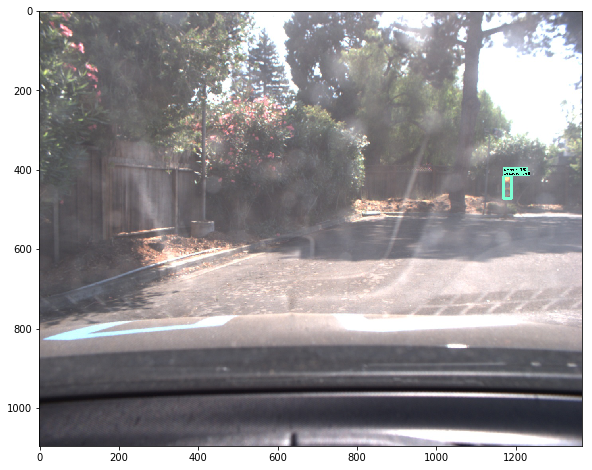

secs=1.309074, scores=[ 0.63586825  0.09294242  0.00817579  0.00452144  0.00449316  0.00442948
  0.00429696  0.00412499  0.00403876  0.00394737], classes=[ 1.  1.  4.  2.  4.  1.  4.  2.  4.  4.]


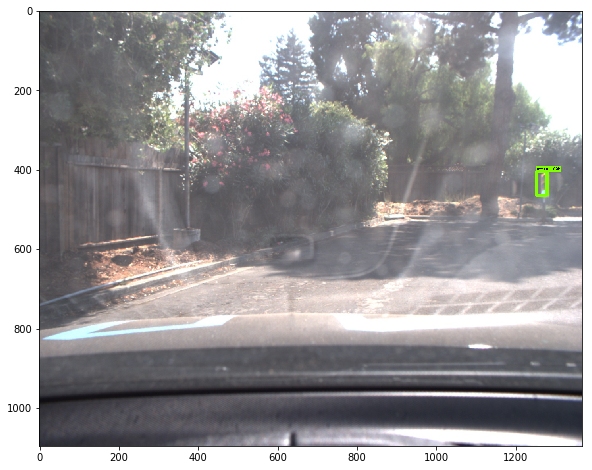

secs=1.294415, scores=[ 0.99593264  0.00430928  0.00430794  0.00414418  0.00372372  0.00372067
  0.00364815  0.00361099  0.00345933  0.00341374], classes=[ 1.  1.  1.  1.  4.  4.  1.  1.  2.  4.]


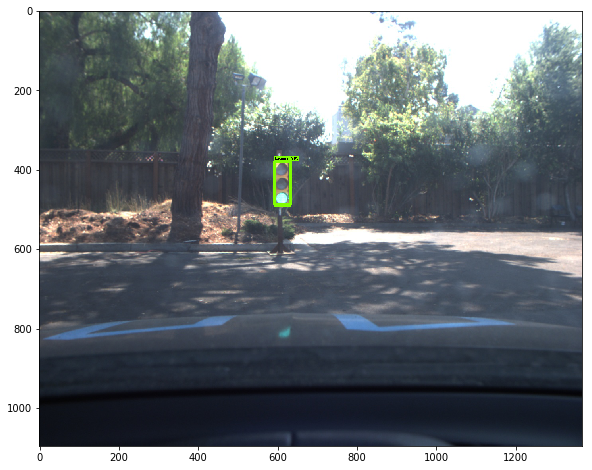

In [6]:
model = load_graph(MODEL)
random.shuffle(TEST_IMAGES)
with model.as_default():
    with tf.Session(graph=model) as sess:
        image_tensor = model.get_tensor_by_name('image_tensor:0')
        detect_boxes = model.get_tensor_by_name('detection_boxes:0')
        detect_scores = model.get_tensor_by_name('detection_scores:0')
        detect_classes = model.get_tensor_by_name('detection_classes:0')
        num_detections = model.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMAGES[1:10]):
            start = datetime.datetime.now() 
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            total = datetime.datetime.now() - start

            print("secs={}, scores={}, classes={}".format(total.total_seconds(), scores[0], classes[0]))
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

secs=1.3676, scores=[ 0.98807901  0.98297137  0.97114456  0.01078968  0.00698131  0.00636393
  0.00626122  0.00620431  0.00612944  0.00514866], classes=[ 2.  2.  2.  2.  2.  2.  3.  2.  4.  4.]


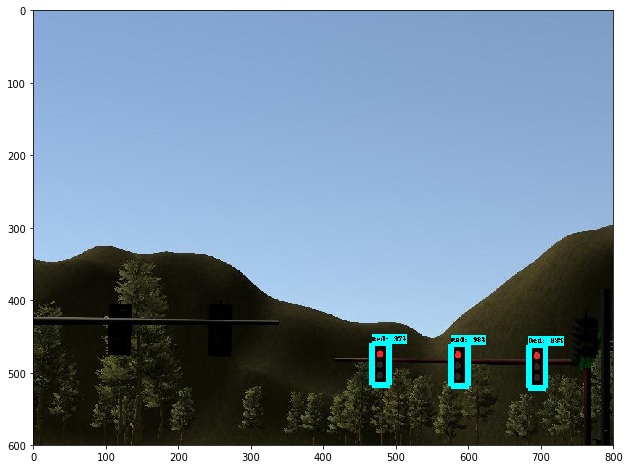

secs=0.532057, scores=[ 0.99417084  0.98782057  0.78677648  0.01361564  0.01290371  0.01226672
  0.01067446  0.01053522  0.00673712  0.00551664], classes=[ 2.  2.  2.  2.  2.  3.  2.  2.  2.  1.]


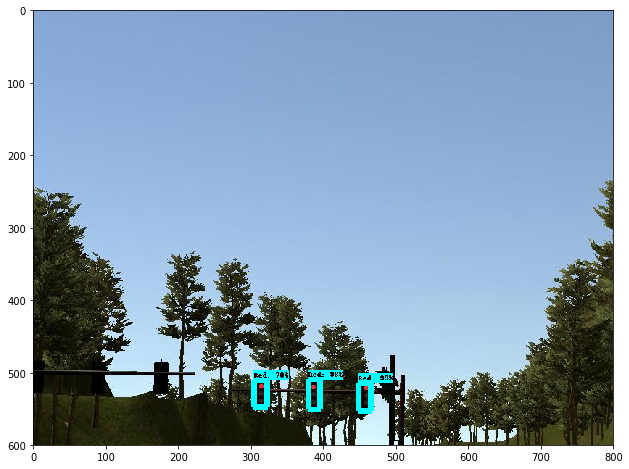

secs=0.555545, scores=[ 0.00624791  0.00573872  0.00509948  0.00505201  0.00502857  0.00494884
  0.00482844  0.004792    0.00464349  0.00463451], classes=[ 1.  3.  1.  4.  4.  2.  2.  1.  1.  1.]


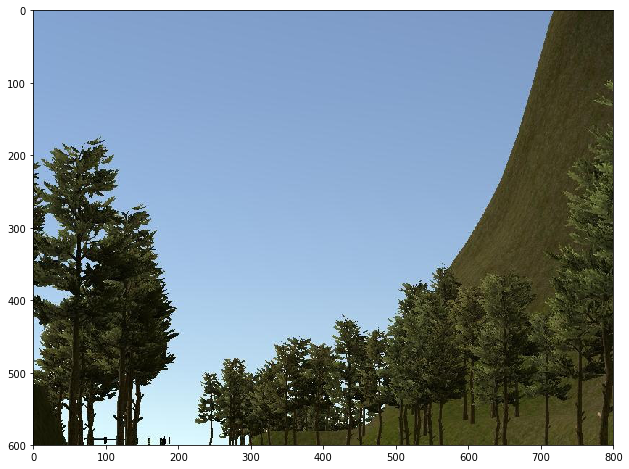

secs=0.526534, scores=[ 0.99853122  0.9984175   0.99543285  0.00553323  0.0046556   0.00420421
  0.0039583   0.00383478  0.00342711  0.00334146], classes=[ 1.  1.  1.  1.  1.  1.  4.  4.  1.  1.]


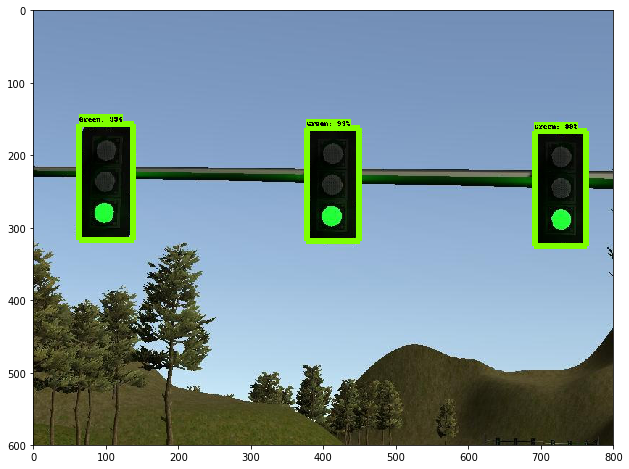

secs=0.558096, scores=[ 0.98609507  0.9674933   0.94719744  0.04346412  0.04188903  0.0375416
  0.0250001   0.01974237  0.01299076  0.01013649], classes=[ 1.  1.  1.  2.  2.  2.  2.  2.  2.  2.]


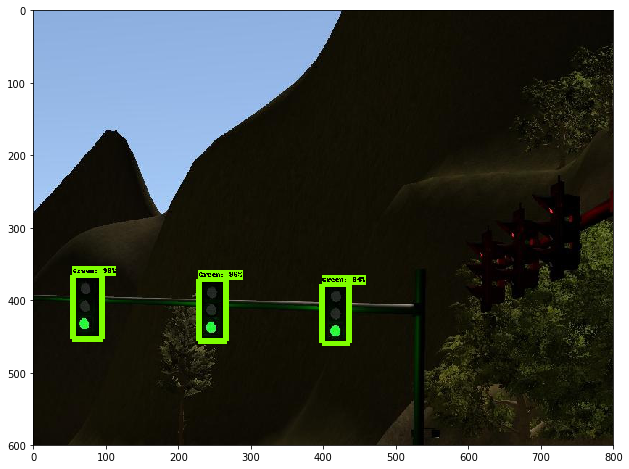

secs=0.572175, scores=[ 0.893812    0.6907441   0.54865259  0.00647647  0.0060463   0.0053258
  0.00516172  0.00509249  0.00509247  0.00503663], classes=[ 2.  2.  2.  2.  2.  2.  3.  2.  3.  4.]


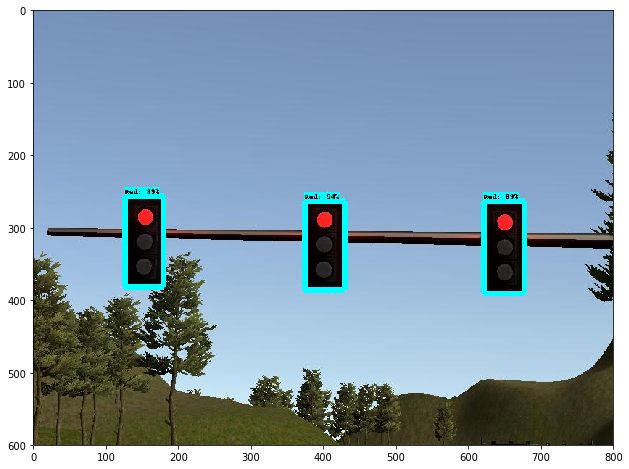

secs=0.533402, scores=[ 0.99372685  0.99203283  0.97883463  0.00709499  0.00567887  0.00548117
  0.00527852  0.00508079  0.0050784   0.00506892], classes=[ 2.  2.  2.  1.  1.  3.  4.  3.  3.  1.]


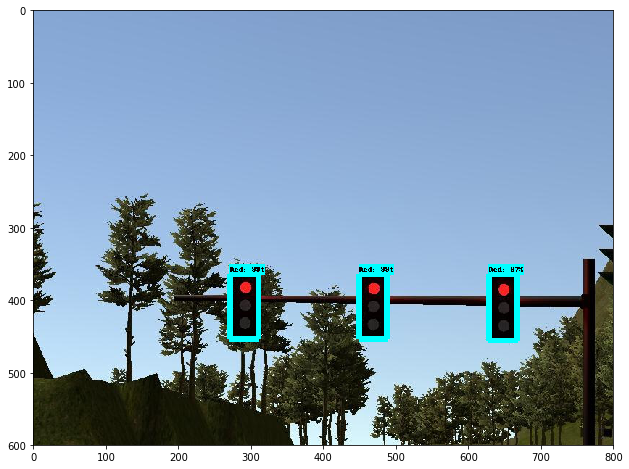

secs=0.525013, scores=[ 0.99936014  0.9971016   0.9703542   0.00489353  0.00451786  0.00445955
  0.00426666  0.00407769  0.00397612  0.00393018], classes=[ 2.  2.  2.  4.  2.  2.  1.  4.  1.  1.]


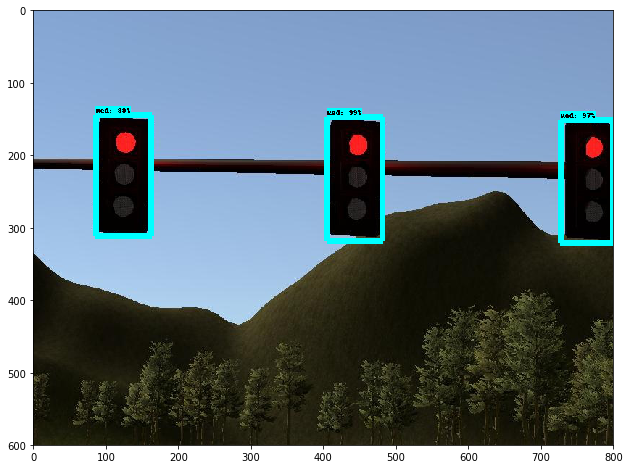

secs=0.499072, scores=[ 0.99969578  0.99969435  0.0061841   0.00608265  0.00563662  0.00514485
  0.0050564   0.00496362  0.00491608  0.00489918], classes=[ 2.  2.  3.  3.  2.  2.  1.  3.  1.  3.]


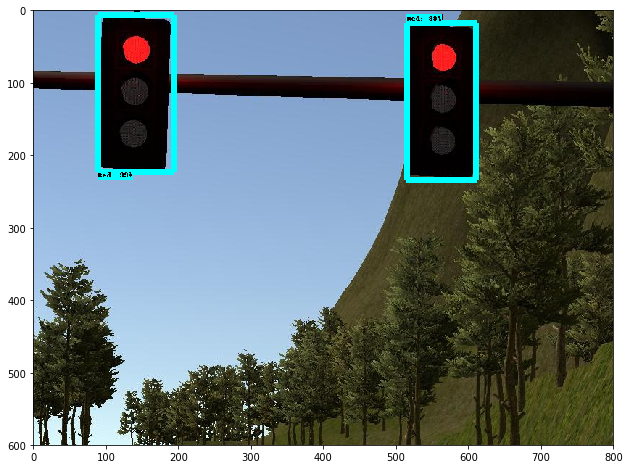

In [12]:
MODEL = "models/udacity_simulator/frozen_inference_graph.pb"
model = load_graph(MODEL)
IMAGES = "data-downloads/alex-lechner-udacity-traffic-light-dataset/simulator_dataset_rgb"

classes = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMAGES = []

for i in classes:
    TEST_IMAGES += glob(os.path.join(os.path.join(IMAGES, i), "*.jpg"))

    random.shuffle(TEST_IMAGES)


with model.as_default():
    with tf.Session(graph=model) as sess:
        image_tensor = model.get_tensor_by_name('image_tensor:0')
        detect_boxes = model.get_tensor_by_name('detection_boxes:0')
        detect_scores = model.get_tensor_by_name('detection_scores:0')
        detect_classes = model.get_tensor_by_name('detection_classes:0')
        num_detections = model.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMAGES[1:10]):
            start = datetime.datetime.now()            
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            total = datetime.datetime.now() - start

            print("secs={}, scores={}, classes={}".format(total.total_seconds(), scores[0], classes[0]))

            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

In [11]:
TEST_IMAGES

[]